In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class LinearRegression:

    def __init__ (self, method="GD", learning_rate=0.001, max_iter=100, precision=0):
        self.method = method
        self.theta = []
        self.J = []

        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.precision = precision

    def coefficients (self):
        return (self.theta)

    def cost_vector (self):
        return (self.J)

    def mean_squared_error (self):
        return (self.J[-1])

    def __linear_comb__ (self, theta, i):
        lc = 0
        for j in range (len (self.x[i, :])):
            lc += theta[j+1] * self.x[i, j] 
        return (lc + theta[0])

    def __J__ (self, theta):
        J = 0
        for i in range (len (self.x)):
            J += (self.__linear_comb__ (theta, i) - self.y[i]) ** 2
        return ((1.0 / (2 * len (self.x))) * J)

    def __derivative_J__ (self, theta, k):
        DJ = 0
        if (k == 0):
            weights = [1 for i in range (len (self.x))]
        else:
            weights = self.x[:, k-1]

        for i in range (len (self.x)):
            DJ += (self.__linear_comb__ (theta, i) - self.y[i]) * weights[i]
        return ((1.0 / len (self.x)) * DJ)

    def __update_theta__ (self):
        actual_theta = self.theta
        for j in range (len (self.theta)):
            self.theta[j] = actual_theta[j] - self.learning_rate * self.__derivative_J__ (actual_theta, j)

    def __gradient_descent__ (self):
        #initializing theta values
        for i in x_train[0, :]:
            self.theta.append (0)
        self.theta.append (0)

        for j in range (self.max_iter):
            self.J.append (self.__J__ (self.theta))
            self.__update_theta__ ()
            #print (self.J[j])
            #evaluates convergency
            if (self.precision != 0 and abs (self.__J__ (self.theta) - self.J[j]) < self.precision):
                break

    def __calculate_theta__ (self):
        if (self.method == "GD"):
            self.__gradient_descent__ ()

    def fit (self, x_train, y_train):
        self.x = x_train
        self.y = y_train
        #print ("sum = ", sum ([i*i for i in y_train]) / (2.0 * len (y_train)))
        self.__calculate_theta__ ()

    def predict (self, x_test):
        x = np.append (np.ones ((len (x_test), 1)), x_test, axis=1)
        theta = np.array (self.theta)
        y = x @ theta
        return (y)

In [4]:
#loading admission predict dataset and scaling for gradient descent
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

dataset = pd.read_csv ("Admission_Predict_Ver1.1.csv")
df = dataset.iloc [:, 1:]

x = df[["GRE Score"]].to_numpy ().reshape (-1, 1)
y = df.iloc[:, -1].to_numpy ()

scaler = MinMaxScaler ()
x = scaler.fit_transform (x)

In [5]:
#train-test splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=0)

[0.4602885874980124, 0.4966324565224851]
0.0033723032667000545


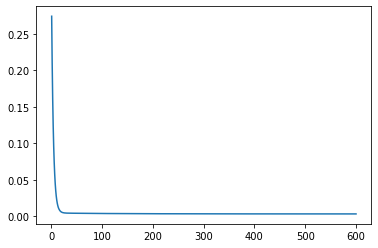

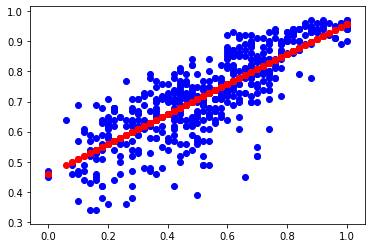

In [6]:
lr = LinearRegression (learning_rate=0.1, max_iter=600, precision=0.00000001)
lr.fit (x_train, y_train)
y_pred = lr.predict (x_train)
print (lr.coefficients ())
print (lr.mean_squared_error ())

J = lr.cost_vector ()
it = [i+1 for i in range (len (J))]

plt.plot (it, J)
plt.show ()

plt.scatter (x, y, color="blue")
plt.scatter (x_train, y_pred, color="red")
plt.show ()